In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [53]:
import pycmap
import pandas as pd

In [29]:
directory = 'gcm_data/dec_1_2021'
file_name = 'chl.0000000000.nc'
f_path = directory + '/' + file_name
DS = xr.open_dataset(f_path)
DS

<xarray.Dataset>
Dimensions:      (Zmd000023: 23, X: 360, Y: 160, T: 11)
Coordinates:
  * X            (X) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * Y            (Y) float64 -79.5 -78.5 -77.5 -76.5 ... 76.5 77.5 78.5 79.5
  * T            (T) datetime64[ns] 2000-01-31 2000-03-01 ... 2000-11-26
Dimensions without coordinates: Zmd000023
Data variables: (12/33)
    diag_levels  (Zmd000023) float64 ...
    iter         (T) int32 ...
    TRAC71       (T, Zmd000023, Y, X) float32 ...
    TRAC72       (T, Zmd000023, Y, X) float32 ...
    TRAC73       (T, Zmd000023, Y, X) float32 ...
    TRAC74       (T, Zmd000023, Y, X) float32 ...
    ...           ...
    TRAC96       (T, Zmd000023, Y, X) float32 ...
    TRAC97       (T, Zmd000023, Y, X) float32 ...
    TRAC98       (T, Zmd000023, Y, X) float32 ...
    TRAC99       (T, Zmd000023, Y, X) float32 ...
    TRAC0a       (T, Zmd000023, Y, X) float32 ...
    TRAC0b       (T, Zmd000023, Y, X) float32 ...
Attributes: (12/18)
    MITgcm_version:  checkpoint68d
    build_user:      birdy
    build_host:      eofe7.cm.cluster
    build_date:      Thu Nov 18 13:27:44 EST 2021
    MITgcm_URL:      http://mitgcm.org
    MITgcm_tag_id:   
    ...              ...
    nSy:             1
    nPx:             12
    nPy:             8
    Nx:              360
    Ny:              160
    Nr:              23

In [11]:
# TODO: when renamed, something goes wrong with indexing 
ds = DS.rename_dims({'Zmd000023':'depth', 'X':'lon', 'Y':'lat', 'T':'time'})
ds = ds.assign_coords(Z=ds.depth)
ds = ds.rename(X='lon', Y='lat', T='time', Z='depth')
ds

NameError: name 'DS' is not defined

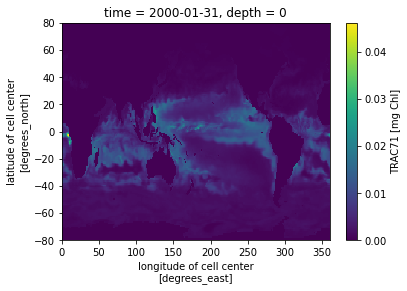

In [98]:
# selecting the surface at t0, plotting 
ds.isel(depth=0, time=0).TRAC71.plot()

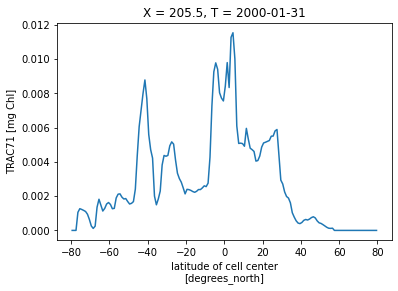

In [106]:
# Plot chlorophyll along the N/S transect at lon=205
trans_ds = DS.sel(X=205, method='nearest')
trans_ds.isel(Zmd000023=0, T=0).TRAC71.plot()

In [61]:
# Get the lat/lon coordinates of cruise MGL1704 from CMAP 
# set up API 
api = pycmap.API(token='68fbf4b0-22f4-11ec-a2c9-a3d02432460d')
traj_df = api.cruise_trajectory('MGL1704')

In [57]:
# plot the level of chlorophyl along MGL1704's transect
dset = DS

# sum all chl vars together and add it as a new variable called 'chl_total'
chl_vars = list(dset.keys())
chl_vars.remove('diag_levels')
chl_vars.remove('iter')

chl_total = dset[chl_vars[0]][t, 0, :, :]
for chl in chl_vars[1:]:
    chl2 = dset[chl][t, 0, :, :]
    chl_total = chl_total + chl2



In [7]:
# sum all chl vars together and add it as a new variable called 'chl_total'
# TODO: make this into a function
chl_vars = list(dset.keys())
chl_vars.remove('diag_levels')
chl_vars.remove('iter')

dset['total_chl'] = dset[chl_vars[0]] 
for chl in chl_vars[1:]:
    dset['total_chl'] = dset['total_chl'] + dset[chl]
DS=dset
dset

<xarray.Dataset>
Dimensions:      (Zmd000023: 23, X: 360, Y: 160, T: 11)
Coordinates:
  * X            (X) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * Y            (Y) float64 -79.5 -78.5 -77.5 -76.5 ... 76.5 77.5 78.5 79.5
  * T            (T) datetime64[ns] 2000-01-31 2000-03-01 ... 2000-11-26
Dimensions without coordinates: Zmd000023
Data variables: (12/34)
    diag_levels  (Zmd000023) float64 1.0 2.0 3.0 4.0 5.0 ... 20.0 21.0 22.0 23.0
    iter         (T) int32 240 480 720 960 1200 1440 1680 1920 2160 2400 2640
    TRAC71       (T, Zmd000023, Y, X) float32 ...
    TRAC72       (T, Zmd000023, Y, X) float32 ...
    TRAC73       (T, Zmd000023, Y, X) float32 ...
    TRAC74       (T, Zmd000023, Y, X) float32 ...
    ...           ...
    TRAC97       (T, Zmd000023, Y, X) float32 ...
    TRAC98       (T, Zmd000023, Y, X) float32 ...
    TRAC99       (T, Zmd000023, Y, X) float32 ...
    TRAC0a       (T, Zmd000023, Y, X) float32 ...
    TRAC0b       (T, Zmd000023, Y, X) float32 ...
    total_chl    (T, Zmd000023, Y, X) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes: (12/18)
    MITgcm_version:  checkpoint68d
    build_user:      birdy
    build_host:      eofe7.cm.cluster
    build_date:      Thu Nov 18 13:27:44 EST 2021
    MITgcm_URL:      http://mitgcm.org
    MITgcm_tag_id:   
    ...              ...
    nSy:             1
    nPx:             12
    nPy:             8
    Nx:              360
    Ny:              160
    Nr:              23

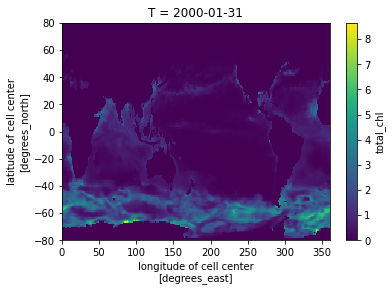

In [51]:
dset['total_chl'].isel(Zmd000023=0, T=0).plot()

In [63]:
dset.total_chl.Y

<xarray.DataArray 'Y' (Y: 160)>
array([-79.5, -78.5, -77.5, -76.5, -75.5, -74.5, -73.5, -72.5, -71.5, -70.5,
       -69.5, -68.5, -67.5, -66.5, -65.5, -64.5, -63.5, -62.5, -61.5, -60.5,
       -59.5, -58.5, -57.5, -56.5, -55.5, -54.5, -53.5, -52.5, -51.5, -50.5,
       -49.5, -48.5, -47.5, -46.5, -45.5, -44.5, -43.5, -42.5, -41.5, -40.5,
       -39.5, -38.5, -37.5, -36.5, -35.5, -34.5, -33.5, -32.5, -31.5, -30.5,
       -29.5, -28.5, -27.5, -26.5, -25.5, -24.5, -23.5, -22.5, -21.5, -20.5,
       -19.5, -18.5, -17.5, -16.5, -15.5, -14.5, -13.5, -12.5, -11.5, -10.5,
        -9.5,  -8.5,  -7.5,  -6.5,  -5.5,  -4.5,  -3.5,  -2.5,  -1.5,  -0.5,
         0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,   9.5,
        10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,  18.5,  19.5,
        20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,  27.5,  28.5,  29.5,
        30.5,  31.5,  32.5,  33.5,  34.5,  35.5,  36.5,  37.5,  38.5,  39.5,
        40.5,  41.5,  42.5,  43.5,  44.5,  45.5,  46.5,  47.5,  48.5,  49.5,
        50.5,  51.5,  52.5,  53.5,  54.5,  55.5,  56.5,  57.5,  58.5,  59.5,
        60.5,  61.5,  62.5,  63.5,  64.5,  65.5,  66.5,  67.5,  68.5,  69.5,
        70.5,  71.5,  72.5,  73.5,  74.5,  75.5,  76.5,  77.5,  78.5,  79.5])
Coordinates:
  * Y        (Y) float64 -79.5 -78.5 -77.5 -76.5 -75.5 ... 76.5 77.5 78.5 79.5
Attributes:
    long_name:  latitude of cell center
    units:      degrees_north

started with 7652 points, after dropping duplicates 5308
(5308, 23)


IntProgress(value=0, max=5308)

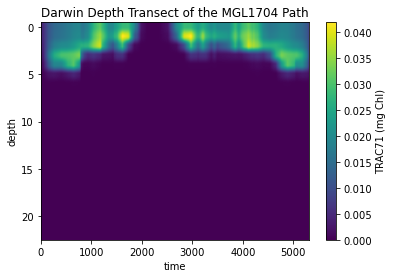

(5308, 23)

In [32]:
from ipywidgets import IntProgress
from IPython.display import display
import time

# Plot var along transect using data from darwin
# make a function that takes 
# lons and lats (denoting an arbitrary transect) - ndarrays
# xarray dset (from the darwin model)
# a selection function (i.e. for inside isel(T=6) or .isel(T=9, Z=8)) - dict
# RETURNS: nd array with interpolated data for each lon/lat coord 
def interp_transect(lons, lats, dset, sel_args, var):
    # Depth Transect 
    traj_interp = [] # list of datasets 
    traj_total_chl = [] # list of "total chl" values at each lon, lat site 
    num_traj_points = len(lons) # number of trajectory points
    h = num_traj_points 
    w = len(dset.Zmd000023) # TODO: hmm.... 
    traj_depth = np.ndarray((h,w)) # 2d ndarray
    print(traj_depth.shape)
    
    # setting up progress bar
    progress_bar = IntProgress(min=0, max=num_traj_points) # instantiate the bar
    display(progress_bar) # display the bar
    
    # for each lon, lat pair in the transect
    for i in range(num_traj_points):
        progress_bar.value += 1
        y = lats[i]
        x = lons[i]
        # TODO: use sel args
        traj_depth[i] = dset[var].isel(**sel_args).interp(X=x, Y=y).data

    return traj_depth

dset = DS
cleaned_traj_df = traj_df.drop_duplicates(subset=['lon', 'lat'])
print(f'started with {len(traj_df)} points, after dropping duplicates {len(cleaned_traj_df)}')
# note: must abs(cleaned_traj_df.lon.iloc[row])
var = 'TRAC71'
sel_args =  {'T':6}
traj_depth = interp_transect(abs(cleaned_traj_df.lon).to_numpy(), cleaned_traj_df.lat.to_numpy(), dset, sel_args, var)

plt.imshow(traj_depth.T, aspect='auto')
plt.xlabel('time')
plt.ylabel('depth')
plt.title('Darwin Depth Transect of the MGL1704 Path')
cbar = plt.colorbar(label=f'{var} ({dset[var].units})')
#plt.savefig('depth_transect_c01')
plt.show()

traj_depth.shape

In [35]:
# do the above for each time step in other file 
months = []
var = 'TRAC71'

for t in range(len(dset.T)):
    print('T = ', t)
    sel_args = {'T': t}
    traj_depth = interp_transect(abs(cleaned_traj_df.lon).to_numpy(), cleaned_traj_df.lat.to_numpy(), dset, sel_args, var)
    months.append(traj_depth)


(5308, 23)


IntProgress(value=0, max=5308)

(5308, 23)


IntProgress(value=0, max=5308)

(5308, 23)


IntProgress(value=0, max=5308)

(5308, 23)


IntProgress(value=0, max=5308)

(5308, 23)


IntProgress(value=0, max=5308)

(5308, 23)


IntProgress(value=0, max=5308)

(5308, 23)


IntProgress(value=0, max=5308)

(5308, 23)


IntProgress(value=0, max=5308)

(5308, 23)


IntProgress(value=0, max=5308)

(5308, 23)


IntProgress(value=0, max=5308)

(5308, 23)


IntProgress(value=0, max=5308)

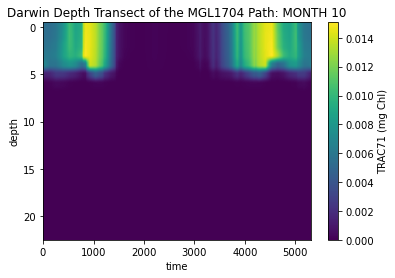

In [45]:
# plot animation 
from matplotlib import animation
from IPython.display import HTML

fig, ax = plt.subplots()
im = plt.imshow(traj_depth.T, aspect='auto', animated=True)
plt.xlabel('time')
plt.ylabel('depth')
title = plt.title('Darwin Depth Transect of the MGL1704 Path')
cbar = plt.colorbar(label=f'{var} ({dset[var].units})')

# increase month with each iteration 
def animate(i):
    im.set_array(months[i].T)
    title = plt.title(f'Darwin Depth Transect of the MGL1704 Path: MONTH {i}')
    return [im, title]

anim = animation.FuncAnimation(fig, animate, frames=len(months))

# save animation to gif
# writergif = animation.PillowWriter(fps=5)
# anim.save('depth_transect_trac71_over_12_months.gif', writer=writergif)

HTML(anim.to_jshtml()) # display interactive plot 

In [163]:
# PLOT DEPTH TRANSECT BY LAT
# using the same data (one point for each lon/lat location), plot abundance along LAT
# this involves averaging values for the latitudes that were traversed twice (out and back)

# convert traj_depth ndarray to df and join with lon/lats
traj_data_df = pd.DataFrame(traj_depth)
cleaned_traj_df = traj_df.drop_duplicates(subset=['lon', 'lat'], ignore_index=True)
traj_data_df['lat'] = cleaned_traj_df.lat
traj_data_df['lon'] = cleaned_traj_df.lon

turn_around_idx = traj_data_df.lat.idxmax()
out_df = traj_data_df.iloc[:turn_around_idx]
back_df = traj_data_df.iloc[turn_around_idx:]

lat_traj_df = combine_out_and_back_df(out_df, back_df, 'lat')
lat_traj_df

/var/folders/3d/888v68391rv_kgq9_5s8b2x80000gn/T/ipykernel_85299/4173607143.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  master_df[buckets[i]] = new_df


,21.3008,21.4008,21.5008,21.6008,21.7008,21.8008,21.9008,22.0008,22.1008,22.2008,...,41.4008,41.5008,41.6008,41.7008,41.8008,41.9008,42.0008,42.1008,42.2008,42.3008
21.3008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


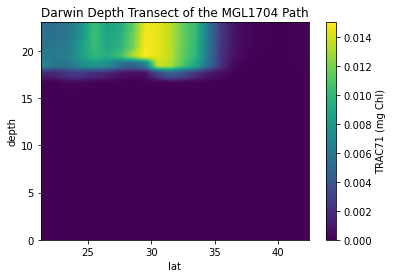

(5308, 23)

In [133]:

x_min = traj_data_df['lat'].min()
x_max = traj_data_df['lat'].max()
y_min = 0
y_max = 23
extent = [x_min, x_max, y_min, y_max]
plt.imshow(lat_traj_df.drop(['lat', 'lon'], axis=0), aspect='auto', extent=extent)
plt.xlabel('lat')
plt.ylabel('depth')
plt.title('Darwin Depth Transect of the MGL1704 Path')
cbar = plt.colorbar(label=f'{var} ({dset[var].units})')
#plt.savefig('depth_transect_TRAC71_lat')
plt.show()

traj_depth.shape

# TODO: organize code to make doing this super easy! 

In [162]:
# NOTE: CODE TAKEN FROM ICFB NOTEBOOK and modified 
# combine out and back heatmap 
# along a given variable (i.e. latitude)
# will return a bucketed range with average vals
# returns a master heatmap to be passed to make_plankton_hm function
# out_hm and back_hm both have rows as lon/lat datapoints and columns as depth 
# NOTE: return a df with one column per bucket, rows as depth 
def combine_out_and_back_df(out_hm, back_hm, var):
    out_max_lat = out_hm[var].max()
    out_min_lat = out_hm[var].min()
    back_max_lat = back_hm[var].max()
    back_min_lat = back_hm[var].min()
    low_bound = min(out_min_lat, back_min_lat)
    high_bound = max(out_max_lat, back_max_lat)
    granularity = 0.1 # in latitude
    buckets = np.arange(low_bound, high_bound, granularity)
    master_df = pd.DataFrame()
    new_dfs = []
    for i in range(len(buckets)-1):
        # get all datapoints that fall within this bucket range
        # TODO: change to make work with dfs with lat NOT as index
        out_lats = [x for x in out_hm[var] if x >= buckets[i] and  x < buckets[i+1]]
        back_lats = [x for x in back_hm[var] if x >= buckets[i] and  x < buckets[i+1]]
#         abund_out = out_hm[out_hm[var] >= buckets[i]][out_hm[var] < buckets[i+1]]
#         abund_back = back_hm[back_hm[var] >= buckets[i]][back_hm[var] < buckets[i+1]]

        abund_out = out_hm.loc[out_hm[var].isin(out_lats)]
        abund_back = back_hm.loc[back_hm[var].isin(back_lats)]
        
#         out_lats = [x for x in out_hm[var] if x >= buckets[i] and  x < buckets[i+1]]
#         back_lats = [x for x in back_hm[var] if x >= buckets[i] and  x < buckets[i+1]]
#         abund_out = out_hm.loc[:, out_lats]
#         abund_back = back_hm.loc[:, back_lats]
        avg_abund = (abund_out.sum() + abund_back.sum()) / (len(abund_out) + len(abund_back))
        #avg_abund = (abund_out.T.sum() + abund_back.T.sum()) / (len(abund_out) + len(abund_back))
        
        new_df = pd.DataFrame(avg_abund, index=[b)
        new_dfs.append(new_df)
        master_df[buckets[i]] = new_df
#     print(len(new_dfs))
#     master_df = pd.concat(new_dfs, axis=1)
    return master_df

# # USAGE EXAMPLE 
# df_ifcb = DF_IFCB
# turn_around_idx = df_ifcb.lat.idxmax()
# # Plot y-axis grouped by type 
# lat_hm = make_hm_df(x='lat', p_cols=p_ordered_by_type)
# out_hm = lat_hm.iloc[:, :turn_around_idx]
# back_hm = lat_hm.iloc[:, turn_around_idx:]
# master_df = combine_out_and_back_hm(out_hm, back_hm)
# make_plankton_hm(master_df)

In [146]:
traj_df.lat
cleaned_traj_df = traj_df.drop_duplicates(subset=['lon', 'lat'], ignore_index=True)
cleaned_traj_df.lat

0       21.3164
1       21.3134
2       21.3131
3       21.3130
4       21.3128
         ...   
5303    22.0210
5304    22.0131
5305    22.0032
5306    21.9945
5307    21.9897
Name: lat, Length: 5308, dtype: float64

In [75]:
# convert traj_depth ndarray to df and join with lon/lats
traj_data_df = pd.DataFrame(traj_depth)
cleaned_traj_df = traj_df.drop_duplicates(subset=['lon', 'lat'], ignore_index=True)
traj_data_df['lat'] = cleaned_traj_df.lat
traj_data_df['lon'] = cleaned_traj_df.lon
traj_data_df

7652
5308


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,lat,lon
0,0.005524,0.005591,0.005768,0.006189,0.006842,0.001213,0.000050,6.778270e-07,5.114216e-09,1.121477e-11,...,1.515579e-11,1.189855e-12,1.863390e-14,2.207398e-18,1.939334e-19,1.091374e-19,2.748874e-20,0.0,21.3164,-157.8767
1,0.005440,0.005502,0.005662,0.006067,0.006800,0.001440,0.000066,8.495559e-07,6.409039e-09,1.486582e-11,...,1.486242e-11,1.193244e-12,2.391170e-14,4.079570e-18,2.172487e-19,1.130769e-19,2.790686e-20,0.0,21.3134,-158.2286
2,0.005440,0.005502,0.005662,0.006067,0.006800,0.001439,0.000066,8.493865e-07,6.406039e-09,1.485896e-11,...,1.486189e-11,1.193035e-12,2.389302e-14,4.077674e-18,2.171806e-19,1.130542e-19,2.790289e-20,0.0,21.3131,-158.2277
3,0.005440,0.005502,0.005663,0.006067,0.006800,0.001439,0.000066,8.492332e-07,6.404301e-09,1.485460e-11,...,1.486188e-11,1.192963e-12,2.388377e-14,4.075984e-18,2.171447e-19,1.130443e-19,2.790131e-20,0.0,21.3130,-158.2272
4,0.005440,0.005502,0.005663,0.006067,0.006800,0.001439,0.000066,8.490714e-07,6.401930e-09,1.484899e-11,...,1.486161e-11,1.192822e-12,2.386980e-14,4.074185e-18,2.170927e-19,1.130280e-19,2.789854e-20,0.0,21.3128,-158.2265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5303,0.005626,0.005708,0.005947,0.006310,0.006412,0.001200,0.000068,2.001251e-06,1.675026e-08,3.156024e-11,...,1.897660e-11,1.941318e-12,4.525010e-14,6.221929e-19,1.224016e-19,1.304463e-19,3.574709e-20,0.0,22.0210,-157.6325
5304,0.005627,0.005709,0.005947,0.006312,0.006421,0.001196,0.000067,1.978058e-06,1.655479e-08,3.116153e-11,...,1.893436e-11,1.931806e-12,4.481717e-14,6.209647e-19,1.233109e-19,1.301750e-19,3.563409e-20,0.0,22.0131,-157.6318
5305,0.005627,0.005709,0.005946,0.006314,0.006432,0.001191,0.000067,1.949139e-06,1.631282e-08,3.067374e-11,...,1.888124e-11,1.919875e-12,4.427777e-14,6.196529e-19,1.244595e-19,1.298388e-19,3.549407e-20,0.0,22.0032,-157.6311
5306,0.005628,0.005710,0.005946,0.006315,0.006442,0.001186,0.000066,1.923747e-06,1.610068e-08,3.024706e-11,...,1.883455e-11,1.909389e-12,4.380404e-14,6.184933e-19,1.254694e-19,1.295439e-19,3.537129e-20,0.0,21.9945,-157.6305


started with 7652 points, after dropping duplicates 5308
157.8767 21.3164 0.030966225054760436
157.8767 21.3164 0.030966225054760436
157.8767 21.3164 0.030966225054760436
157.8767 21.3164 0.030966225054760436
157.8767 21.3164 0.030966225054760436
157.8767 21.3164 0.030966225054760436
157.8767 21.3164 0.030966225054760436
157.8767 21.3164 0.030966225054760436
157.8767 21.3164 0.030966225054760436
157.8767 21.3164 0.030966225054760436
157.8767 21.3164 0.030966225054760436
157.8767 21.3164 0.030966225054760436
157.8767 21.3164 0.030966225054760436
157.8767 21.3164 0.030966225054760436
157.8767 21.3164 0.030966225054760436
157.8767 21.3164 0.030966225054760436
157.8767 21.3164 0.030966225054760436
157.8767 21.3164 0.030966225054760436
157.8767 21.3164 0.030966225054760436
157.8767 21.3164 0.030966225054760436
157.8767 21.3164 0.030966225054760436
157.8767 21.3164 0.030966225054760436
157.8767 21.3164 0.030966225054760436
157.8767 21.3164 0.030966225054760436
157.8767 21.3164 0.030966225054

157.8767 21.3164 0.030966225054760436
157.8767 21.3164 0.030966225054760436
157.8767 21.3164 0.030966225054760436
157.8767 21.3164 0.030966225054760436
157.8767 21.3164 0.030966225054760436
157.8767 21.3164 0.030966225054760436
157.8767 21.3164 0.030966225054760436
157.8767 21.3164 0.030966225054760436
157.8767 21.3164 0.030966225054760436
157.8767 21.3164 0.030966225054760436
157.8767 21.3164 0.030966225054760436
157.8767 21.3164 0.030966225054760436
157.8767 21.3164 0.030966225054760436
157.8767 21.3164 0.030966225054760436
157.8767 21.3164 0.030966225054760436
157.8767 21.3164 0.030966225054760436
157.8767 21.3164 0.030966225054760436
157.8767 21.3164 0.030966225054760436
157.8767 21.3164 0.030966225054760436
157.8767 21.3164 0.030966225054760436
157.8767 21.3164 0.030966225054760436
157.8767 21.3164 0.030966225054760436
157.8767 21.3164 0.030966225054760436
157.8767 21.3164 0.030966225054760436
157.8767 21.3164 0.030966225054760436
157.8767 21.3164 0.030966225054760436
157.8767 21.

158.3077 21.7468 0.03173395426101174
158.3058 21.7549 0.03179075604647202
158.3036 21.7643 0.031856606682356924
158.3017 21.7724 0.03191332292944756
158.2997 21.7804 0.03196974308909743
158.2977 21.7883 0.032025507032660945
158.2956 21.7963 0.032082201859810616
158.2936 21.8042 0.032137883186643144
158.2916 21.8122 0.0321941380870897
158.2896 21.8202 0.03225035180144188
158.2877 21.8282 0.032306171653163275
158.2857 21.8359 0.032360463568438684
158.2837 21.8437 0.032415329070198715
158.2818 21.8515 0.03246980473784282
158.2798 21.8593 0.03252459093063014
158.2779 21.8669 0.03257776433391851
158.2758 21.8744 0.032630981790285105
158.2738 21.882 0.032684424893000746
158.2717 21.8895 0.032737561959259566
158.2699 21.8959 0.032782901046926285
158.2699 21.8959 0.032782901046926285
158.2699 21.8959 0.032782901046926285
158.2699 21.8959 0.032782901046926285
158.2699 21.8959 0.032782901046926285
158.2699 21.8959 0.032782901046926285
158.2664 21.9439 0.03308822046462534
158.2665 21.9517 0.03313

158.0028 23.6946 0.04218823753945499
158.002 23.7031 0.04222109293284192
158.0019 23.7135 0.042260250599424724
158.0019 23.7181 0.04227751786834563
158.0018 23.7316 0.04232831236156791
158.0016 23.7398 0.04235933093372405
158.0014 23.7485 0.04239222661689335
158.0011 23.7588 0.04243124760448232
158.001 23.7641 0.04245126181038803
158.0008 23.777 0.04249992423509956
158.0007 23.7847 0.04252894786775713
158.0006 23.7953 0.04256885773927206
158.0004 23.8029 0.04259762549583777
158.0003 23.8136 0.04263791108475148
158.0002 23.8214 0.042667310601824965
157.9999 23.8317 0.04270633385806334
157.9998 23.8365 0.042724472021998104
157.9998 23.8395 0.04273573370188066
157.9997 23.8412 0.042742234859566255
157.9998 23.8434 0.04275037388572798
157.9996 23.8451 0.042756994634194835
157.9996 23.8474 0.04276562861925872
157.9996 23.8491 0.042772010260392894
157.9995 23.8513 0.04278038846082667
157.9995 23.8529 0.04278639472191016
157.9994 23.8552 0.04279514835409044
157.9993 23.8572 0.0428027758388282

158.0004 25.6424 0.04985670260665177
158.0003 25.6529 0.04992087007238667
158.0003 25.6614 0.04997280805662431
158.0004 25.6709 0.050030837999933804
158.0005 25.6815 0.05009558217894565
158.0006 25.6891 0.05014199118979074
158.0009 25.7007 0.0502127741952562
158.001 25.7071 0.050251836888555806
158.0012 25.7201 0.05033117078641846
158.0013 25.7241 0.05035556371271361
158.0017 25.7395 0.05044944505746346
158.0019 25.745 0.05048293924728595
158.0026 25.757 0.05055586667391733
158.0035 25.7608 0.05057861810174882
158.0045 25.763 0.050591542567251256
158.0053 25.7639 0.050596631055812046
158.0062 25.7645 0.05059983748879247
158.0071 25.7648 0.050601214054405985
158.0074 25.7647 0.050600455224129495
158.0074 25.7647 0.050600455224129495
158.0074 25.7647 0.050600455224129495
158.0104 25.766 0.05060685350748299
158.011 25.7662 0.05060776555146353
158.0137 25.7676 0.050614892309226556
158.0141 25.7679 0.05061650742002349
158.0141 25.7683 0.05061893294219311
158.0142 25.7683 0.05061888169838436

157.9996 26.5121 0.055101082818512656
157.9996 26.5227 0.05510287700557861
157.9996 26.532 0.055104451150834594
157.9996 26.5359 0.055105111276264516
157.9996 26.5506 0.05510759944134656
157.9995 26.56 0.0551093942351639
157.9996 26.5691 0.05511073080556544
157.9996 26.5691 0.05511073080556544
157.9994 26.5881 0.05511426590431406
157.9992 26.5974 0.05511610067749619
157.9991 26.604 0.05511731087248028
157.9988 26.6146 0.05511937543576063
157.9987 26.6254 0.055121168581391114
157.9985 26.6347 0.055122783758422354
157.9985 26.6381 0.0551233004628662
157.9984 26.6531 0.055125637418526406
157.9985 26.6626 0.05512702377429977
157.9986 26.6717 0.055128378578884155
157.9987 26.6798 0.05512960687655285
157.9987 26.6901 0.055131204568467665
157.9989 26.699 0.055132614645462485
157.9989 26.7024 0.05513315272791386
157.999 26.7119 0.055134691244799645
157.999 26.7211 0.05513616169420257
157.999 26.7277 0.055137216581817715
157.999 26.7381 0.05513887882896885
157.9989 26.7466 0.05514014779978171
1

158.0007 30.1262 0.05564209426433286
158.0009 30.1351 0.05579220554438108
158.0011 30.1409 0.05588937834301305
158.0011 30.1509 0.05606002531378433
158.0012 30.1604 0.05622121176470625
158.0013 30.1687 0.05636190289711572
158.0013 30.1735 0.056443803217339286
158.0015 30.1842 0.056624465635889104
158.0016 30.1935 0.05678216426510517
158.0017 30.2017 0.05692107894535309
158.0017 30.2071 0.057013193797674715
158.0016 30.217 0.057183059487539545
158.0014 30.2261 0.057340296072691616
158.0014 30.2344 0.05748190653540146
158.0014 30.2397 0.05757233249351734
158.0014 30.2508 0.05776171516051484
158.0015 30.2611 0.05793641319115503
158.0015 30.2701 0.05808995711829929
158.0015 30.2719 0.058120665903728136
158.0013 30.288 0.0583974671060057
158.0012 30.297 0.05855210388158846
158.0011 30.3059 0.058705053360738765
158.001 30.3074 0.058731735159410506
158.001 30.3237 0.05900990708423324
158.0011 30.3326 0.059160680772697975
158.0011 30.3416 0.059314263046392104
158.0012 30.3431 0.059338737311956

157.9998 32.258 0.2368860492091392
157.9998 32.2581 0.23690099778551044
157.9998 32.2581 0.23690099778551044
157.9998 32.2581 0.23690099778551044
157.9998 32.2581 0.23690099778551044
157.9998 32.2581 0.23690099778551044
157.9998 32.2581 0.23690099778551044
157.9998 32.2581 0.23690099778551044
157.9998 32.2581 0.23690099778551044
157.9998 32.2581 0.23690099778551044
157.9998 32.2581 0.23690099778551044
157.9998 32.2581 0.23690099778551044
157.9998 32.2581 0.23690099778551044
157.9998 32.2581 0.23690099778551044
157.9998 32.2581 0.23690099778551044
157.9998 32.2581 0.23690099778551044
157.9998 32.2581 0.23690099778551044
157.9998 32.2581 0.23690099778551044
157.9998 32.2581 0.23690099778551044
157.9998 32.2581 0.23690099778551044
157.9998 32.2581 0.23690099778551044
157.9998 32.2581 0.23690099778551044
157.9998 32.2581 0.23690099778551044
157.9998 32.2581 0.23690099778551044
157.9998 32.2581 0.23690099778551044
157.9998 32.2581 0.23690099778551044
157.9998 32.2581 0.23690099778551044
157

157.9988 34.5115 0.34966949969499084
157.9988 34.5269 0.3509877527344748
157.9989 34.5358 0.3517507130371023
157.9989 34.5389 0.35201607366182425
157.9992 34.5535 0.353269140644598
157.9994 34.5623 0.3540245967230488
157.9995 34.5692 0.35461630707154307
157.9997 34.5786 0.3554230828816104
157.9998 34.5887 0.3562886714210536
157.9999 34.5974 0.35703441567814587
157.9999 34.6027 0.35748806255080806
157.9999 34.6138 0.35843815317091204
157.9999 34.6237 0.35928553129154556
158.0 34.6325 0.36003980666399005
158.0 34.6342 0.36018531494140626
158.0001 34.6501 0.3615472843216385
158.0003 34.6591 0.3623196828823343
158.0005 34.668 0.36308349922811967
158.0005 34.6688 0.36315197113082376
158.0009 34.6857 0.36460250428295227
158.0011 34.6947 0.36537481045151815
158.0013 34.7035 0.36612997644965023
158.0014 34.7044 0.36620800668148024
158.0017 34.7192 0.36747763425472746
158.0017 34.727 0.36814517491570686
158.0016 34.7349 0.3688202894820788
158.0016 34.7354 0.36886308087268815
158.0015 34.7508 0.

158.0012 37.2289 0.7333396000642951
158.0014 37.2377 0.7350331912086452
158.0014 37.2398 0.7354464448760343
158.0019 37.2551 0.7383611507223568
158.0022 37.2638 0.740015093321126
158.0023 37.2686 0.7409401292989699
158.0024 37.281 0.7433602298251161
158.0025 37.2899 0.7450916574876916
158.0026 37.2986 0.746783634079256
158.0026 37.2998 0.7470196915297215
158.0026 37.3162 0.7502458100194265
158.0026 37.325 0.7519768979895118
158.0025 37.3327 0.7535112999640117
158.0025 37.3327 0.7535112999640117
158.0021 37.3511 0.7572102065831665
158.002 37.3598 0.7589417521041851
158.002 37.3681 0.7605747854154564
158.0019 37.3756 0.7620703786103329
158.0017 37.3865 0.7642550845977184
158.0017 37.3912 0.7651798999834629
158.0017 37.4023 0.767364038447668
158.0017 37.4092 0.7687217461416338
158.0017 37.4175 0.7703549307590122
158.0018 37.4257 0.77194817333342
158.0019 37.4305 0.772872342187511
158.002 37.4425 0.7752130599164948
158.0021 37.4518 0.7770224205112858
158.002 37.4596 0.778577502039717
158.0

158.0009 39.3843 2.42996705662085
158.0011 39.3956 2.4430084783048764
158.0012 39.4058 2.4548060815797665
158.0013 39.4144 2.464747580073009
158.0013 39.4187 2.4697347672838235
158.0013 39.4306 2.4835365179370026
158.0012 39.439 2.493312468813368
158.0011 39.4471 2.502740799772458
158.0011 39.4502 2.5063363375695396
158.001 39.4626 2.520752498500133
158.0011 39.4713 2.5308091916077116
158.0011 39.4801 2.5410158795478046
158.0011 39.4874 2.549482791134473
158.001 39.4973 2.5610000174738303
158.001 39.5059 2.5642352747427206
158.0009 39.5114 2.5643664133911845
158.0007 39.5223 2.5646263625208277
158.0007 39.5316 2.5647891854220886
158.0009 39.5403 2.5648734012295837
158.001 39.5439 2.564902567216037
158.0011 39.5574 2.5651058796416972
158.0012 39.5659 2.565221687866064
158.0013 39.5731 2.565314896867435
158.0013 39.5731 2.565314896867435
158.0017 39.5915 2.565506351207554
158.0019 39.6 2.5655906417250613
158.0019 39.6083 2.565737699435554
158.0019 39.6083 2.565737699435554
158.0021 39.62

158.0004 41.2586 2.74475950242743
158.0007 41.2697 2.747249719348789
158.0008 41.2794 2.749371369499893
158.0008 41.2871 2.7510275991205977
158.0009 41.2923 2.7521828641111448
158.001 41.3016 2.754221286056139
158.0011 41.3104 2.7561533267835077
158.0012 41.3181 2.757849663473296
158.0013 41.3194 2.758168261662998
158.0014 41.323 2.7589826962141473
158.0015 41.3352 2.7616515421112036
158.0016 41.3452 2.763847643281477
158.0018 41.3538 2.7657840827927505
158.0019 41.3602 2.767206456610258
158.002 41.3697 2.7692990339967296
158.0021 41.3797 2.7715008977722055
158.0019 41.3884 2.773293283285439
158.0018 41.3921 2.7740483312089026
158.0013 41.4055 2.7767172787471597
158.001 41.4142 2.7784563134288334
158.0007 41.4229 2.780191788252606
158.0008 41.4314 2.782065772402113
158.0008 41.4351 2.782861622999076
158.0009 41.4474 2.7855546380356655
158.0009 41.4573 2.7876847512648895
158.001 41.4661 2.789626810059764
158.001 41.4747 2.7914777979408045
158.001 41.4834 2.793350308936742
158.001 41.483

157.9995 41.5128 2.794188888099867
157.9995 41.5033 2.795651151689189
157.9996 41.495 2.795138650569432
157.9997 41.4874 2.7935602273451807
157.9997 41.4798 2.791931208428411
157.9996 41.4705 2.789888878823322
157.9995 41.463 2.7882333924356755
157.9993 41.4591 2.7873016855751227
157.9993 41.4591 2.7873016855751227
157.998 41.4547 2.785737753768297
157.9981 41.4526 2.7853377688961323
157.9985 41.4497 2.784909359452978
157.9988 41.448 2.784688536220927
157.9992 41.4353 2.782160252177582
157.9997 41.4253 2.7802494280384233
157.9999 41.4193 2.7790542269057807
157.9996 41.4168 2.7783822362614385
157.9995 41.4168 2.7783369735361156
157.9988 41.4165 2.7779560152110525
157.9989 41.4165 2.7780012574774346
157.9992 41.4165 2.7781369842765815
157.9993 41.4166 2.778203633723791
158.0 41.4166 2.778520377326012
157.9999 41.4166 2.778475128239979
158.0 41.4166 2.778520377326012
158.0 41.4166 2.778520377326012
157.9999 41.4166 2.778475128239979
158.0 41.4166 2.778520377326012
157.9999 41.4166 2.77847

157.9999 41.4166 2.778475128239979
157.9999 41.4166 2.778475128239979
157.9999 41.4166 2.778475128239979
157.9999 41.4166 2.778475128239979
157.9999 41.4166 2.778475128239979
157.9999 41.4166 2.778475128239979
157.9999 41.4166 2.778475128239979
157.9999 41.4166 2.778475128239979
157.9999 41.4166 2.778475128239979
157.9999 41.4166 2.778475128239979
157.9999 41.4166 2.778475128239979
157.9999 41.4166 2.778475128239979
157.9999 41.4166 2.778475128239979
157.9999 41.4166 2.778475128239979
157.9999 41.4166 2.778475128239979
157.9999 41.4166 2.778475128239979
157.9999 41.4166 2.778475128239979
157.9996 41.4168 2.7783822362614385
157.998 41.4139 2.777039795420594
157.9974 41.4093 2.7757906357449484
157.997 41.3996 2.7735503488404336
157.9967 41.3914 2.7716772302728234
157.9964 41.3848 2.7701468175486728
157.9964 41.3848 2.7701468175486728
157.9953 41.3779 2.76821465950203
157.9941 41.3771 2.7675349204577433
157.9932 41.3766 2.7670469666326727
157.9919 41.3754 2.766243360380391
157.9912 41.373

157.9995 40.1307 2.5755627870501847
157.9994 40.1252 2.575491466215227
157.9993 40.1243 2.575499747127639
157.9994 40.1141 2.5752996539441804
157.9994 40.1083 2.5751994277124624
157.9996 40.1022 2.5750455775040657
157.9996 40.1005 2.575016141361955
157.9996 40.0912 2.5748551083492313
157.9996 40.0853 2.5747529476207287
157.9997 40.0795 2.5746279013295794
157.9997 40.0781 2.574603635305729
157.9998 40.0679 2.5744020199296727
157.9999 40.0618 2.5742712558808574
157.9998 40.0565 2.574204225704314
157.9998 40.0515 2.574117473851086
157.9997 40.0459 2.574045516757169
157.9998 40.0389 2.573898859180953
157.9999 40.0329 2.573769324521316
158.0 40.0271 2.573643056976795
158.0 40.0267 2.5736361028313635
157.9999 40.0157 2.573470597206987
158.0 40.0095 2.5733370745778084
158.0 40.0038 2.5732379780054093
158.0 40.0036 2.5732345009326933
158.0001 39.992 2.57300668267393
158.0001 39.9863 2.572907486371671
158.0001 39.9843 2.5728726806515803
158.0 39.9747 2.572732063925266
158.0 39.9687 2.5726277517

157.999 38.7557 1.7012377638709644
157.9989 38.752 1.6969645896148249
157.9988 38.7418 1.6851492525325866
157.9988 38.7346 1.6767950204097488
157.9988 38.7277 1.6687888812920244
157.9988 38.7248 1.6654239822425505
157.9989 38.7148 1.65380179954839
157.9988 38.7067 1.6444223709337373
157.9988 38.6998 1.6364162318160211
157.9987 38.6928 1.6283127050668575
157.9987 38.6927 1.6281966720690046
157.9985 38.6791 1.612452924155524
157.9985 38.6722 1.6044463718344995
157.9986 38.6653 1.5964217250847892
157.9987 38.6626 1.5932707397139425
157.9989 38.6523 1.5812836710765685
157.9989 38.6447 1.572465466654399
157.9991 38.6379 1.5645403993101419
157.9993 38.631 1.5564998538980597
157.9993 38.6305 1.5559197487933065
157.9997 38.6177 1.54100048106883
157.9999 38.6104 1.5324975323322665
158.0 38.6035 1.524476047486063
158.0001 38.5998 1.5201669997644274
158.0002 38.5905 1.5093619286449764
158.0003 38.583 1.5006452478795376
158.0003 38.5761 1.4926411747783142
158.0004 38.5724 1.4883328955748938
158.00

157.9985 37.8821 1.0231519737842436
157.9983 37.8698 1.0155952612061152
157.9981 37.8596 1.0093352868752588
157.9979 37.8507 1.0038781011206839
157.9979 37.8439 0.9996801631438719
157.9979 37.8345 0.9938771312347545
157.998 37.8243 0.9875614281071687
157.9982 37.8155 0.9820910538294083
157.9983 37.8067 0.9766393714900464
157.9983 37.8025 0.974046427959026
157.9985 37.79 0.9662913355553131
157.9987 37.7802 0.9602029032863262
157.9988 37.7714 0.9547507513468954
157.9988 37.7662 0.9515402863412483
157.9988 37.7551 0.9446871783484282
157.9988 37.745 0.938451467472077
157.9987 37.7362 0.9330376907215692
157.9986 37.7281 0.9280561878860296
157.9986 37.7281 0.9280561878860296
157.9983 37.7101 0.9170016702765375
157.9979 37.7014 0.9117086687769292
157.9977 37.6928 0.9064386616864749
157.9976 37.6893 0.9042975953764255
157.9977 37.6761 0.8961292176791711
157.9977 37.6668 0.8903880302978606
157.9978 37.6582 0.8850591955239373
157.9978 37.6529 0.8817873046629373
157.9979 37.6418 0.874914977097845

158.0135 36.3277 0.5616033405231081
158.0128 36.3363 0.5630105913232402
158.0125 36.3392 0.563493346938194
158.0113 36.3527 0.5657197283908779
158.0106 36.3616 0.5671787415094414
158.0099 36.3701 0.5685779286061032
158.0096 36.3738 0.5691869499049803
158.0085 36.3864 0.5712735613942868
158.0078 36.3956 0.5727862932340883
158.0071 36.404 0.5741772123624796
158.0068 36.4081 0.5748512389306031
158.006 36.42 0.5768001689291002
158.0055 36.4295 0.5783392851872647
158.005 36.438 0.5797248191830525
158.0049 36.4405 0.580126108165234
158.004 36.4552 0.5825307797073375
158.0035 36.4638 0.5839357118330684
158.0029 36.4724 0.5853561676502559
158.0028 36.4737 0.5855723484237649
158.0018 36.4897 0.5882028314461601
158.0015 36.4984 0.5895995626112704
158.0014 36.5071 0.591260272449767
158.0014 36.5079 0.5914177024182953
158.0011 36.5248 0.5947877827700793
158.0009 36.5337 0.5965690430875377
158.0007 36.5426 0.598350519730192
158.0006 36.5447 0.598778774401766
158.0004 36.5596 0.6017416363294207
158.

158.0 36.9999 0.6884846212089055
158.0 36.9999 0.6884846212089055
158.0 36.9999 0.6884846212089055
158.0 36.9999 0.6884846212089055
158.0 36.9999 0.6884846212089055
158.0 36.9999 0.6884846212089055
158.0 36.9999 0.6884846212089055
158.0 36.9999 0.6884846212089055
158.0 36.9999 0.6884846212089055
158.0 36.9999 0.6884846212089055
158.0 36.9999 0.6884846212089055
158.0 36.9999 0.6884846212089055
158.0 36.9999 0.6884846212089055
158.0 36.9999 0.6884846212089055
158.0 36.9999 0.6884846212089055
158.0 36.9999 0.6884846212089055
158.0 36.9999 0.6884846212089055
158.0 36.9999 0.6884846212089055
158.0 36.9999 0.6884846212089055
158.0 36.9999 0.6884846212089055
158.0 36.9999 0.6884846212089055
158.0 36.9999 0.6884846212089055
158.0 36.9999 0.6884846212089055
158.0 36.9999 0.6884846212089055
158.0 36.9999 0.6884846212089055
158.0 36.9999 0.6884846212089055
158.0 36.9999 0.6884846212089055
158.0 36.9999 0.6884846212089055
158.0 36.9999 0.6884846212089055
158.0 36.9999 0.6884846212089055
158.0 36.9

157.9996 35.969 0.5073772933107744
157.9995 35.9772 0.5086618842965183
157.9995 35.9851 0.5098931140790564
157.9995 35.9871 0.5102048178214703
157.9991 35.9957 0.5115731824427179
157.9987 35.9982 0.5119911532641082
157.9983 35.9986 0.5120817564761936
157.9978 35.9982 0.5120545803953742
157.9985 35.9992 0.5121612513606308
157.999 35.9997 0.512203902174273
157.9993 35.9998 0.5121982799221853
157.9997 35.9998 0.5121699932494249
158.0001 35.9999 0.5121572826853473
158.0001 35.9999 0.5121572826853473
158.0001 35.9999 0.5121572826853473
158.0001 35.9999 0.5121572826853473
158.0001 35.9999 0.5121572826853473
158.0001 35.9999 0.5121572826853473
158.0001 35.9999 0.5121572826853473
158.0001 35.9999 0.5121572826853473
158.0001 35.9999 0.5121572826853473
158.0001 35.9999 0.5121572826853473
158.0001 35.9999 0.5121572826853473
158.0001 35.9999 0.5121572826853473
158.0001 35.9999 0.5121572826853473
158.0001 35.9999 0.5121572826853473
158.0001 35.9999 0.5121572826853473
158.0001 35.9999 0.512157282685

158.0001 35.4999 0.4342837561209474
158.0001 35.4999 0.4342837561209474
158.0001 35.4999 0.4342837561209474
158.0001 35.4999 0.4342837561209474
158.0001 35.4999 0.4342837561209474
158.0001 35.4999 0.4342837561209474
158.0001 35.4999 0.4342837561209474
158.0001 35.4999 0.4342837561209474
158.0001 35.4999 0.4342837561209474
158.0001 35.4999 0.4342837561209474
158.0001 35.4999 0.4342837561209474
158.0001 35.4999 0.4342837561209474
158.0001 35.4999 0.4342837561209474
158.0001 35.4999 0.4342837561209474
158.0001 35.4999 0.4342837561209474
158.0001 35.4999 0.4342837561209474
158.0001 35.4999 0.4342837561209474
158.0001 35.5 0.43429231536686425
158.0001 35.4999 0.4342837561209474
158.0001 35.4999 0.4342837561209474
158.0001 35.5 0.43429231536686425
158.0001 35.4999 0.4342837561209474
158.0001 35.4999 0.4342837561209474
158.0001 35.4999 0.4342837561209474
158.0001 35.4999 0.4342837561209474
158.0001 35.4999 0.4342837561209474
158.0001 35.4999 0.4342837561209474
158.0001 35.4999 0.4342837561209

158.0 34.7817 0.37281029783487324
157.9999 34.7799 0.3726552749726496
157.9998 34.7758 0.3723033826797816
157.9997 34.7723 0.37200284212027435
157.9997 34.7691 0.37172893799242857
157.9997 34.7672 0.37156630741652025
157.9997 34.7633 0.3712324867607081
157.9996 34.7598 0.37093193587805723
157.9996 34.7569 0.37068370839112763
157.9996 34.7541 0.3704440404727125
157.9996 34.7535 0.37039268306162365
158.0001 34.7406 0.36929340187616594
158.0002 34.7318 0.36854117454382423
158.0 34.7235 0.3678287791609765
157.9996 34.7155 0.36714004702599023
157.9992 34.7053 0.3662629574133779
157.9989 34.6965 0.36550666542189714
157.9988 34.6913 0.36506053193520044
157.999 34.6799 0.3640867218706253
157.9992 34.6702 0.3632584582790948
157.9995 34.6614 0.3625082887293221
157.9996 34.6588 0.36228677167808515
158.0001 34.6437 0.36099949258297587
158.0004 34.6348 0.36024086637351993
158.0006 34.6258 0.35947266105961295
158.0006 34.6255 0.35944698428965816
158.0008 34.608000000000004 0.357951305076218
158.001 

158.001 34.2348 0.3429601152252674
158.0013 34.2208 0.34265925081623533
158.0016 34.2119 0.34246891613007546
158.0018 34.2031 0.34227982657553674
158.0019 34.2005 0.3422243113141537
158.0021 34.1854 0.3418985244024612
158.0021 34.1766 0.3417076419102813
158.0021 34.1686 0.3415341123719359
158.002 34.1602 0.3413510664058687
158.0019 34.1501 0.3411311630040265
158.0017 34.1413 0.34093864885519987
158.0015 34.134 0.3407786943110227
158.0015 34.134 0.3407786943110227
158.001 34.1149 0.3403604898303509
158.0006 34.1067 0.34017952716219885
158.0003 34.099000000000004 0.34001024559967535
158.0003 34.0988 0.34000591049626827
157.9996 34.0835 0.33966886298813814
157.9993 34.0758 0.33949970909188754
157.9991 34.0703 0.33937901832162864
157.9988 34.0598 0.33914927756649016
157.9985 34.0495 0.33892392364311225
157.9981 34.0407 0.338730373497467
157.998 34.0372 0.3386538434065818
157.9975 34.0235 0.33835355869770045
157.9972 34.0144 0.3381543944410515
157.9969 34.0057 0.3379639360959721
157.9968 34

158.0 34.0001 0.3378644353806973
158.0 34.0001 0.3378644353806973
158.0 34.0001 0.3378644353806973
158.0 34.0001 0.3378644353806973
158.0 34.0001 0.3378644353806973
158.0 34.0001 0.3378644353806973
158.0 34.0001 0.3378644353806973
158.0 34.0001 0.3378644353806973
158.0 34.0001 0.3378644353806973
158.0 34.0001 0.3378644353806973
158.0 34.0001 0.3378644353806973
158.0 34.0001 0.3378644353806973
158.0 34.0001 0.3378644353806973
158.0 34.0001 0.3378644353806973
158.0 34.0001 0.3378644353806973
158.0 34.0001 0.3378644353806973
158.0 34.0001 0.3378644353806973
158.0 34.0001 0.3378644353806973
158.0 34.0001 0.3378644353806973
158.0 34.0001 0.3378644353806973
158.0 34.0001 0.3378644353806973
158.0 34.0001 0.3378644353806973
158.0 34.0001 0.3378644353806973
158.0 34.0001 0.3378644353806973
158.0 34.0001 0.3378644353806973
158.0 34.0001 0.3378644353806973
158.0 34.0001 0.3378644353806973
158.0 34.0001 0.3378644353806973
158.0 34.0001 0.3378644353806973
158.0 34.0001 0.3378644353806973
158.0 34.0

157.9987 32.9122 0.29530996705175744
157.9988 32.9032 0.2948239854688453
157.9988 32.8992 0.2946081768215943
157.9987 32.8858 0.2938856603926171
157.9986 32.8762 0.2933681842968677
157.9985 32.8673 0.29288849441353376
157.9985 32.8659 0.29281296622538283
157.9983 32.8497 0.2919399654438632
157.9983 32.8405 0.2914436585470408
157.9984 32.8317 0.290968425348606
157.9984 32.8297 0.2908605302409555
157.9986 32.8168 0.29016356274241445
157.9987 32.8085 0.2897152473338455
157.9989 32.8009 0.28930413897155105
157.9989 32.8002 0.2892663716518842
157.9992 32.7853 0.2884607923311281
157.9995 32.7766 0.2879896634217561
157.9997 32.7691 0.28758380777363257
157.9997 32.7691 0.28758380777363257
158.0003 32.7506 0.2865819112368904
158.0007 32.7419 0.28610994384688687
158.0008 32.7381 0.28590422976857677
158.001 32.7247 0.28517970581311575
158.0011 32.7168 0.2847526462909602
158.0012 32.7115 0.28446591607257127
158.0013 32.7018 0.28394165741138583
158.0013 32.6933 0.2834828192366464
158.0013 32.6874 0

158.0 32.0001 0.19833172573559035
158.0 32.0001 0.19833172573559035
158.0 32.0001 0.19833172573559035
158.0 32.0001 0.19833172573559035
158.0 32.0001 0.19833172573559035
158.0 32.0001 0.19833172573559035
158.0 32.0001 0.19833172573559035
158.0 32.0001 0.19833172573559035
158.0 32.0001 0.19833172573559035
158.0 32.0001 0.19833172573559035
158.0 32.0001 0.19833172573559035
158.0 32.0001 0.19833172573559035
158.0 32.0001 0.19833172573559035
158.0 32.0001 0.19833172573559035
158.0 32.0001 0.19833172573559035
158.0 32.0001 0.19833172573559035
158.0 32.0001 0.19833172573559035
158.0 32.0001 0.19833172573559035
158.0 32.0001 0.19833172573559035
158.0 32.0001 0.19833172573559035
158.0 32.0001 0.19833172573559035
158.0 32.0001 0.19833172573559035
158.0 32.0001 0.19833172573559035
158.0 32.0001 0.19833172573559035
158.0 32.0001 0.19833172573559035
158.0 32.0001 0.19833172573559035
158.0 32.0001 0.19833172573559035
158.0 32.0001 0.19833172573559035
158.0 32.0001 0.19833172573559035
158.0 32.0001 

157.9993 30.609 0.0687484549269088
157.9996 30.5999 0.06818463521731613
157.9998 30.5926 0.06773284687382027
158.0001 30.5826 0.06711361699841148
158.0002 30.5764 0.066730781576957
158.0004 30.5663 0.0661066513579929
158.0005 30.5565 0.06550225166519931
158.0004 30.5478 0.06496810305511748
158.0004 30.5445 0.06476501065514513
158.0003 30.5322 0.06400931233339875
158.0004 30.5243 0.0635218389947082
158.0005 30.5166 0.0630466706695849
158.0005 30.5166 0.0630466706695849
158.0006 30.5008 0.0620729954910507
158.0006 30.4923 0.06189232142189946
158.0005 30.4849 0.061767277074647464
158.0004 30.4764 0.061623437594016645
158.0003 30.4668 0.061460799464907206
158.0002 30.4584 0.06131863002476209
158.0002 30.4561 0.061279359172218495
157.9999 30.4416 0.06103546515977448
157.9997 30.4331 0.06089274387891297
157.9996 30.4255 0.06076414939681159
157.9993 30.4167 0.0606174429908429
157.9991 30.4078 0.06046777993935545
157.999 30.4029 0.0603852450137787
157.9991 30.3911 0.060182443727399226
157.9991

158.002 29.5821 0.04635081602696626
158.002 29.5821 0.04635081602696626
158.002 29.5821 0.04635081602696626
158.002 29.5821 0.04635081602696626
158.002 29.5821 0.04635081602696626
158.002 29.5821 0.04635081602696626
158.002 29.5821 0.04635081602696626
158.002 29.5821 0.04635081602696626
158.002 29.5821 0.04635081602696626
158.002 29.5821 0.04635081602696626
158.002 29.5821 0.04635081602696626
158.002 29.5821 0.04635081602696626
158.002 29.5821 0.04635081602696626
158.002 29.5821 0.04635081602696626
158.002 29.5821 0.04635081602696626
158.002 29.5821 0.04635081602696626
158.002 29.5821 0.04635081602696626
158.002 29.5821 0.04635081602696626
158.002 29.5821 0.04635081602696626
158.002 29.5821 0.04635081602696626
158.002 29.5821 0.04635081602696626
158.002 29.5821 0.04635081602696626
158.002 29.5821 0.04635081602696626
158.002 29.5821 0.04635081602696626
158.002 29.5821 0.04635081602696626
158.002 29.5821 0.04635081602696626
158.002 29.5821 0.04635081602696626
158.002 29.5821 0.0463508160

157.9159 27.8593 0.05109190990708325
157.915 27.8472 0.05118686895292988
157.9143 27.8379 0.05125968397870928
157.9136 27.8296 0.051323785066332846
157.9134 27.8274 0.051340606556417145
157.9121 27.8129 0.05145155774122417
157.9114 27.8045 0.05151632924158744
157.9109 27.7962 0.05158240293174691
157.9108 27.7943 0.05159768317774663
157.9101 27.7799 0.05171407491100545
157.9097 27.7717 0.051780289314539624
157.9096 27.7673 0.051817099527294776
157.909 27.7555 0.05191202448697936
157.9087 27.747 0.051981863410957646
157.9083 27.7387 0.052048806502148055
157.9083 27.7385 0.05205052953776324
157.9076 27.7223 0.0521820171631028
157.9073 27.714 0.05225001628599978
157.907 27.7058 0.05231712774554429
157.907 27.7058 0.05231712774554429
157.9066 27.6889 0.05245791764857863
157.9064 27.6806 0.05252699452824345
157.9062 27.6724 0.05259519312460706
157.9062 27.6724 0.05259519312460706
157.9059 27.6556 0.05273616794585574
157.9056 27.6473 0.05280398313349446
157.9054 27.6424 0.052843731965663276
1

157.8148 25.7787 0.05079111645307676
157.8146 25.7735 0.05075619514846465
157.8143 25.763 0.05068560823202469
157.814 25.7543 0.05062712975803838
157.8137 25.7458 0.05056998162352837
157.8137 25.7458 0.05056998162352837
157.8131 25.729 0.05045698210015856
157.8129 25.7221 0.050410535325888885
157.8127 25.7173 0.05037823975725365
157.8123 25.7079 0.0503149780825122
157.812 25.6991 0.05025571062057913
157.8116 25.6912 0.05020252241644978
157.8115 25.6901 0.05019512579070834
157.8107 25.6743 0.05008867713548619
157.8102 25.6657 0.050030711633131435
157.8098 25.6606 0.04999633847922786
157.8094 25.6525 0.04994168886573426
157.8091 25.6462 0.04989916738242813
157.8089 25.6408 0.04986270554082512
157.8088 25.6391 0.049851228144474624
157.8079 25.6264 0.04976545413171709
157.8073 25.618 0.049708679375430186
157.8068 25.6098 0.04965322550472111
157.8066 25.6071 0.049634959144863704
157.8057 25.5941 0.04954696374151249
157.805 25.5854 0.04948802022131905
157.8044 25.5771 0.04943175743882821
157

157.6871 23.1243 0.040400410134476566
157.6867 23.1185 0.040379067379029285
157.6862 23.1083 0.0403411930446284
157.6857 23.0984 0.04030447323142768
157.6853 23.0897 0.04027214620364944
157.6851 23.081 0.04023947017972207
157.6851 23.0808 0.040238710805137745
157.6844 23.0636 0.040174680497800694
157.6841 23.055 0.04014258701622672
157.6836 23.0466 0.04011162981557159
157.6836 23.0466 0.04011162981557159
157.6827 23.0289 0.04004615167052941
157.6824 23.0204 0.04001447475224494
157.6819 23.0119 0.03998318537416497
157.6817 23.0095 0.039974464976730364
157.6812 22.9949 0.03992006708361613
157.6806 22.9861 0.039887868604663985
157.6802 22.9774 0.039855674559834124
157.6801 22.974 0.039842985621144605
157.6796 22.9607 0.03979357424073116
157.679 22.9513 0.03975915462008007
157.6786 22.9428 0.03972775947685273
157.6784 22.9382 0.03971074029002366
157.6779 22.9267 0.03966820431211827
157.6775 22.9168 0.03963153797373918
157.6771 22.9081 0.03959942538077911
157.6767 22.9003 0.0395707290798459

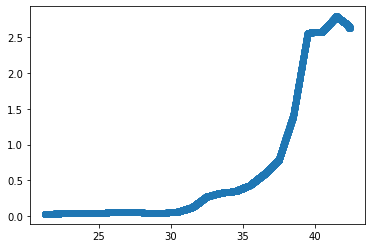

In [116]:
## Plot chl level along transect using data from darwin
traj_interp = [] # list of datasets 
traj_total_chl = [] # list of "total chl" values at each lon, lat site 
cleaned_traj_df = traj_df.drop_duplicates(subset=['lon', 'lat'])
print(f'started with {len(traj_df)} points, after dropping duplicates {len(cleaned_traj_df)}')
# for each lat, lon pair in the transect
for row in traj_df.index:
    # note: there are a lot of identicle lon, lat pairs. filter to save time and space
    y = traj_df.lat[row]
    x = abs(traj_df.lon[row])
    # THIS WORKS
    # dset.total_chl.isel(T=0, Zmd000023=0).interp(X=150.99999, Y=24.222)
    chl_val = dset.total_chl.isel(T=6, Zmd000023=0).interp(X=x, Y=y).data.item()
    #dset_interp = dset.total_chl.isel(T=6, Zmd000023=0).interp(X=x, Y=y)
    # looking at surface water in June
    print(x, y, chl_val)
    traj_total_chl.append(chl_val)
    
fig, ax = plt.subplots()
ax.scatter([lat for lat in traj_df['lat']], traj_total_chl)
plt.show()

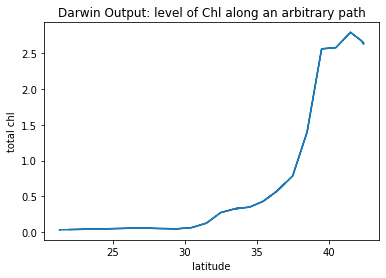

In [121]:
fig, ax = plt.subplots()
ax.plot([lat for lat in traj_df['lat']], traj_total_chl)
plt.xlabel("latitude")
plt.ylabel("total chl")
plt.title("Darwin Output: level of Chl along an arbitrary path")
#plt.savefig("Darwin Output: level of Chl along an arbitrary path")
plt.show()

In [122]:
# Testing performance
import time

x = traj_df['lon'].iloc[50]
y = traj_df['lat'].iloc[50]
start_time = time.time()
dset['total_chl'].isel(T=6).interp(X=x, Y=y)
print("this took", time.time() - start_time, "to run")

start_time = time.time()
dset['total_chl'].interp(X=x, Y=y).isel(T=6)
print("this took", time.time() - start_time, "to run")


this took 0.014399290084838867 to run
this took 0.07155609130859375 to run


In [127]:
len(dset.Zmd000023)

23

started with 7652 points, after dropping duplicates 5308
(5308, 23)


IntProgress(value=0, max=5308)

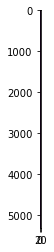

[[3.09662251e-02 3.13401719e-02 3.36035856e-02 ... 1.44359492e-11
  1.98999278e-12 0.00000000e+00]
 [2.96156361e-02 2.99580246e-02 3.22993473e-02 ... 1.36311680e-11
  1.90871531e-12 0.00000000e+00]
 [2.96175880e-02 2.99600732e-02 3.23012806e-02 ... 1.36321837e-11
  1.90874732e-12 0.00000000e+00]
 ...
 [3.55480057e-02 3.61098434e-02 3.77748444e-02 ... 1.95162876e-11
  2.69223778e-12 0.00000000e+00]
 [3.55039499e-02 3.60630136e-02 3.77338016e-02 ... 1.94542315e-11
  2.68312899e-12 0.00000000e+00]
 [3.54798779e-02 3.60374197e-02 3.77113496e-02 ... 1.94201673e-11
  2.67812102e-12 0.00000000e+00]]


In [143]:
# Depth Transect 
## Plot chl level along transect using data from darwin
cleaned_traj_df = traj_df.drop_duplicates(subset=['lon', 'lat'])
print(f'started with {len(traj_df)} points, after dropping duplicates {len(cleaned_traj_df)}')
traj_interp = [] # list of datasets 
traj_total_chl = [] # list of "total chl" values at each lon, lat site 
h = len(cleaned_traj_df)
w = len(dset.Zmd000023)
traj_depth = np.ndarray((h,w)) # 2d ndarray
print(traj_depth.shape)
# for each lat, lon pair in the transect

# setting up progress bar
from ipywidgets import IntProgress
from IPython.display import display
import time
progress_bar = IntProgress(min=0, max=len(cleaned_traj_df.index)) # instantiate the bar
display(progress_bar) # display the bar

for row in range(len(cleaned_traj_df)):
    progress_bar.value += 1
    y = cleaned_traj_df.lat.iloc[row]
    x = abs(cleaned_traj_df.lon.iloc[row])
    traj_depth[row] = dset.total_chl.isel(T=6).interp(X=x, Y=y).data
    
fig, ax = plt.subplots()
plt.imshow(traj_depth)
plt.show()
print(traj_depth)

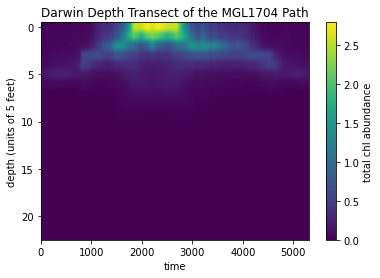

(5308, 23)

In [157]:
plt.imshow(traj_depth.T, aspect='auto')
plt.xlabel('time')
plt.ylabel('depth (units of 5 feet)')
plt.title('Darwin Depth Transect of the MGL1704 Path')
cbar = plt.colorbar(label="total chl abundance")
#plt.savefig('depth_transect_chl')
plt.show()

traj_depth.shape

In [111]:
dset.total_chl.isel(T=6, Zmd000023=0).interp(X=150.99999, Y=24.222).data.item()

0.04384893402289614

In [90]:
dset_interp = dset['total_chl'].isel(T=5, Zmd000023=0).interp(X=x, Y=y)
dset_interp

<xarray.DataArray 'total_chl' ()>
array(nan)
Coordinates:
    T        datetime64[ns] 2000-07-29
    X        float64 -157.9
    Y        float64 21.32

In [66]:
# average distance between points 
traj_df.lat.diff().mean()

8.800156842242812e-05

In [68]:
traj_df.lon.diff().mean()

3.223108090445704e-05

In [69]:
traj_df.lon.diff()

0          NaN
1       0.0000
2       0.0000
3       0.0000
4       0.0000
         ...  
7647    0.0007
7648    0.0007
7649    0.0006
7650    0.0004
7651    0.0000
Name: lon, Length: 7652, dtype: float64

In [33]:
# Create dummy dataset
ds = xr.Dataset(
    {var: (("x", "y", "z"), np.ones((5, 3, 2))) for var in "abcde"}
)

# Sum over (a slice of some of the) variables
vars_to_sum = ["a", "c", "d"]
summed_variables = ds[vars_to_sum].isel(y=-1).to_array().sum("variable")

In [53]:
import pandas as pd
pd.date_range("1/1/2000", "1/3/2000", periods=3)

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03'], dtype='datetime64[ns]', freq=None)

In [54]:
ds.dims["x"]

5

In [37]:
ds[vars_to_sum].isel(y=-1)

<xarray.Dataset>
Dimensions:  (x: 5, z: 2)
Dimensions without coordinates: x, z
Data variables:
    a        (x, z) float64 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0
    c        (x, z) float64 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0
    d        (x, z) float64 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0

In [40]:
ds['ab'] = ds['a'] + ds['b']

In [45]:
letters_to_sum = 'abcd'
ds['abcd'] = ds[letters_to_sum[0]] 
for letter in 'abcd'[1:]:
    print(letter)
    ds['abcd'] = ds['abcd'] + ds[letter]

ds

b
c
d


<xarray.Dataset>
Dimensions:  (x: 5, y: 3, z: 2)
Dimensions without coordinates: x, y, z
Data variables:
    a        (x, y, z) float64 1.0 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0
    b        (x, y, z) float64 1.0 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0
    c        (x, y, z) float64 1.0 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0
    d        (x, y, z) float64 1.0 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0
    e        (x, y, z) float64 1.0 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0
    ab       (x, y, z) float64 2.0 2.0 2.0 2.0 2.0 2.0 ... 2.0 2.0 2.0 2.0 2.0
    abcd     (x, y, z) float64 4.0 4.0 4.0 4.0 4.0 4.0 ... 4.0 4.0 4.0 4.0 4.0

In [26]:
ds['b']

<xarray.DataArray 'b' (x: 5, y: 3, z: 2)>
array([[[0.71820586, 0.67933338],
        [0.53393792, 0.5192742 ],
        [0.53783191, 0.98571453]],

       [[0.89479752, 0.57002782],
        [0.93750499, 0.50775487],
        [0.99158083, 0.79719328]],

       [[0.82999977, 0.92283902],
        [0.16572785, 0.68424769],
        [0.46621269, 0.92436467]],

       [[0.97618046, 0.81494425],
        [0.02250076, 0.59347469],
        [0.94046554, 0.976859  ]],

       [[0.72326864, 0.41768149],
        [0.81274426, 0.87888862],
        [0.2520386 , 0.65548817]]])
Dimensions without coordinates: x, y, z

In [27]:
ds['a'] + ds['b']

<xarray.DataArray (x: 5, y: 3, z: 2)>
array([[[1.02445087, 0.93821037],
        [1.52789454, 0.60501053],
        [0.84939498, 1.16513633]],

       [[1.71178729, 1.12564511],
        [1.17858418, 0.95556209],
        [1.90628096, 1.17331364]],

       [[1.02299561, 1.25810807],
        [0.17043677, 0.82154217],
        [0.82807958, 1.15562802]],

       [[1.55567604, 1.10943322],
        [0.02444328, 0.81589329],
        [1.43490959, 1.96184703]],

       [[1.24369029, 0.56640229],
        [1.31077836, 1.42916603],
        [0.95929668, 1.33473424]]])
Dimensions without coordinates: x, y, z

In [78]:
traj_df

,time,lat,lon
0,2017-05-26T22:34:53,21.3164,-157.8767
1,2017-05-26T22:37:53,21.3164,-157.8767
2,2017-05-26T22:40:53,21.3164,-157.8767
3,2017-05-26T22:43:54,21.3164,-157.8767
4,2017-05-26T22:46:54,21.3164,-157.8767
...,...,...,...
7647,2017-06-13T17:55:24,22.0131,-157.6318
7648,2017-06-13T17:58:24,22.0032,-157.6311
7649,2017-06-13T18:01:24,21.9945,-157.6305
7650,2017-06-13T18:04:24,21.9897,-157.6301
